
Nowowanie Rubla, Rubelka i Kopiejek
               no effectiveDate     mid
0  190/A/NBP/2019    2019-10-01  0.0617
1  191/A/NBP/2019    2019-10-02  0.0613
2  192/A/NBP/2019    2019-10-03  0.0609
3  193/A/NBP/2019    2019-10-04  0.0608
4  194/A/NBP/2019    2019-10-07  0.0608
5  195/A/NBP/2019    2019-10-08  0.0607

Notowanie dolarów kanadyjskich
               no effectiveDate     mid
0  190/A/NBP/2019    2019-10-01  3.0255
1  191/A/NBP/2019    2019-10-02  3.0327
2  192/A/NBP/2019    2019-10-03  2.9760
3  193/A/NBP/2019    2019-10-04  2.9621
4  194/A/NBP/2019    2019-10-07  2.9639

Dodatkowe informacje typu np. typ zmiennych:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
no               6 non-null object
effectiveDate    6 non-null object
mid              6 non-null float64
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes
None

Wykres dolarów kanadyjskich:


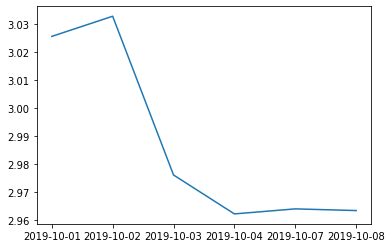


Wykres rubelków:


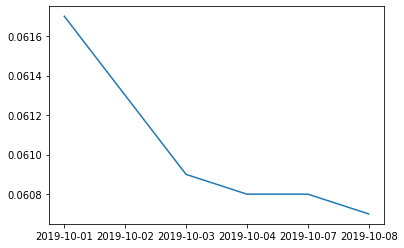


Na wykresie rozjechały się daty ale to celowe działanie bo przy rublach nie użyłem .head

Użycie funkcji corrcoef:


[[1.         0.91538297]
 [0.91538297 1.        ]]

Próba 5-tki(zadania 5-tego):




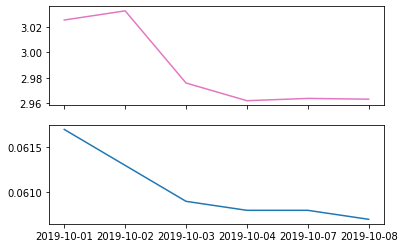


DODATEK:


0   2019-10-01
1   2019-10-02
2   2019-10-03
3   2019-10-04
4   2019-10-07
5   2019-10-08
Name: effectiveDate, dtype: datetime64[ns]

In [77]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
import matplotlib.gridspec as gridspec
# Powyżej import funkcji itd.


def wczytaj(waluta,od,do):
    currency_req = requests.get('http://api.nbp.pl/api/exchangerates/rates/A/'+waluta+'/'+od+'/'+do+'/')
    currency_data = currency_req.json()
    return currency_data['rates']
print("\nNowowanie Rubla, Rubelka i Kopiejek")
rates = wczytaj('RUB','2019-10-01','2019-10-08')
#print(rates) - wyświetliłbym wszystkie parametry na raz więc ustawiłem komentarz. 
                
kursy_rub = pd.DataFrame.from_dict(rates)
print(kursy_rub)

print("\nNotowanie dolarów kanadyjskich")
rates = wczytaj('cad','2019-10-01','2019-10-08')
#print(rates)

kursy_cad = pd.DataFrame.from_dict(rates)
# .head wyświetla tylko pierwsze 4 pozycje
print(kursy_cad.head())
print("\nDodatkowe informacje typu np. typ zmiennych:\n\n")
print(kursy_cad.info())


print("\nWykres dolarów kanadyjskich:")
dane_wykrescan = kursy_cad.set_index(['effectiveDate'])['mid']

plt.plot(dane_wykrescan)
plt.show()


print("\nWykres rubelków:")
dane_wykres = kursy_rub.set_index(['effectiveDate'])['mid']

plt.plot(dane_wykres)
plt.show()
print("\nNa wykresie rozjechały się daty ale to celowe działanie bo przy rublach nie użyłem .head")


print("\nUżycie funkcji corrcoef:\n\n")
print(np.corrcoef(dane_wykrescan ,dane_wykres))



print("\nPróba 5-tki(zadania 5-tego):\n\n")

wykresy, (jeden, dwa) = plt.subplots(2, sharex=True)
jeden.plot(dane_wykrescan, 'tab:pink')
dwa.plot(dane_wykres, 'tab:blue')
plt.show()


print("\nDODATEK:")
kursy_rub['effectiveDate'].astype('datetime64')

